# Assingment \#5 (Programming Assignment)

## Description : Using MNIST Dataset, create a Multilayer Perceptrons(MLP) model that exceeds 80% accuracy for the test dataset.

## [Assignment Submission Checklist]
### 1) If you want to use additional packages, you can do. But it is enough provided.
### 2) [IMPORTANT] You should print your model accuracy on test dataset.
### 3) Before save and download your .ipynb file for submission, you SHOULD run all cells in .ipynb file to print your results.
### 4) If you have a question about Assignment \#5, send email to "mc.kim@skku.edu"

## 0. Import Packages

In [69]:
# !pip install numpy==1.18.5
# !pip install tensorflow==2.3.0

### >>> DO NOT MODIFY >>> ###

import numpy as np
import tensorflow as tf

print("{:15}".format("numpy"), np.__version__)              # (Tested) 1.18.5
print("{:15}".format("tensorflow"), tf.__version__)         # (Tested) 2.3.0

### <<< DO NOT MODIFY <<< ###


# >>> Description >>>
# It will be tested in the version written above. I recommend you match the version.
# If the version is different, please uncomment line 1, 2.
# <<< Description <<<

numpy           1.18.5
tensorflow      2.3.0


## 1. Load dataset
MNIST Dataset : Handwritten Digit Database  

Training set : 60,000 examples  
Test set : 10,000 examples  

Each example : 28\*28\*1 greyscale image  
Label : 10 classes

API : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data


In [70]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [71]:
print(train_data.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


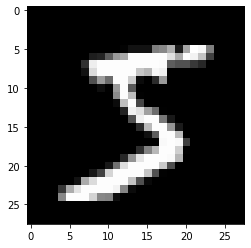

In [72]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap="gray")
plt.show()

## 2. Preprocess dataset

In [73]:
train_data = train_data / 255.0
train_data = train_data.reshape([-1, 28*28])
train_data = train_data.astype(np.float32)

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)

test_data = test_data / 255.0
test_data = test_data.reshape([-1, 28*28])
test_data = test_data.astype(np.float32)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

## 3. Modeling

In [75]:
class MultiLayerPreceptron(tf.keras.Model):
  def __init__(self):
    super(MultiLayerPreceptron, self).__init__()
    self.layer1 = tf.keras.layers.Dense(512, activation='relu')
    self.layer2 = tf.keras.layers.Dense(258, activation='relu')
    self.layer3 = tf.keras.layers.Dense(64, activation='relu')
    self.outlayer = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, input):
    x = self.layer1(input)
    x = tf.keras.layers.Dropout(0.1)(x)

    x = self.layer2(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    x = self.layer3(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    x = self.outlayer(x)
    
    return x
  

In [76]:
model = MultiLayerPreceptron()

optim = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [77]:
model.fit(x=train_data, y=train_labels, 
          batch_size=32, epochs=15,
          validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2438 - accuracy: 0.9268 - val_loss: 0.0970 - val_accuracy: 0.9712
Epoch 2/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1111 - accuracy: 0.9669 - val_loss: 0.0748 - val_accuracy: 0.9783
Epoch 3/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0819 - accuracy: 0.9754 - val_loss: 0.0839 - val_accuracy: 0.9767
Epoch 4/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0666 - accuracy: 0.9790 - val_loss: 0.0739 - val_accuracy: 0.9785
Epoch 5/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0543 - accuracy: 0.9834 - val_loss: 0.0858 - val_accuracy: 0.9785
Epoch 6/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0861 - val_accuracy: 0.9793
Epoch 7/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0427 - accuracy: 0.9869 - val_loss: 0.0644 - val_ac

In [78]:
history = model.evaluate(x=test_data, y=test_labels, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9807


## Summary

In [79]:
print("{:30}".format("Accuracy of testing dataset"), format(history[1]*100, '.2f'), "%")
print("{:30}".format("Loss of testing dataset"), format(history[0], '.3f'))

Accuracy of testing dataset    98.07 %
Loss of testing dataset        0.092
